In [48]:
import sys
sys.path.append('..')

import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

import model
from utils.data_utils import Season
from utils.model_utils import Feature
from data.load_footystats import GenerateDataFrame
from data.load_csv import DataLoader

In [2]:
df_past1 = GenerateDataFrame(season=Season.Past1).load()
# df_past2 = GenerateDataFrame(season=Season.Past2).load()
# df_past5 = GenerateDataFrame(season=Season.Past5).load()
# df_past10 = GenerateDataFrame(season=Season.Past10).load()

(380, 219)


In [3]:
params = {
    Feature.GOAL_STATS.value: False,
    Feature.SHOOTING_STATS.value: False,
    Feature.POSSESSION_STATS.value: False,
    Feature.RESULT.value: False,
    Feature.ODDS.value: False,
    Feature.XG.value: False,
    Feature.HOME_AWAY_RESULTS.value: False,
    Feature.CONCEDED_STATS.value: False,
    Feature.LAST_N_MATCHES.value: False,
    Feature.WIN_STREAK.value: False,
    Feature.PAIRWISE_STATS.value: False,
    Feature.PI_RATINGS.value: True,
    Feature.PI_PAIRWISE.value: False,
    Feature.PI_WEIGHTED.value: False
}
# df = DataLoader('epl-training.csv', season).load()
model.run(df=df_past1, feature_params=params)

Logistic Regression:
[0 1 1 1 0 1 0 0 0 1]
Accuracy: 0.7
F1 Score: 0.4924242424242424
Precision: 0.4666666666666666
Recall: 0.5555555555555555
Cross Validation Accuracy: mean=0.58917, std=0.13892



Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


Random Forest:
[0 1 1 1 1 1 0 0 0 1]
Accuracy: 0.6
F1 Score: 0.4222222222222222
Precision: 0.4166666666666667
Recall: 0.5
Cross Validation Accuracy: mean=0.63833, std=0.13407



Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


XGBoost:
[2 1 1 1 2 1 2 0 0 1]
Accuracy: 0.4
F1 Score: 0.3333333333333333
Precision: 0.3666666666666667
Recall: 0.3888888888888889
Cross Validation Accuracy: mean=0.715, std=0.16311

CatBoost:
[[2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]]
Accuracy: 0.5
F1 Score: 0.3703703703703704
Precision: 0.38888888888888884
Recall: 0.4444444444444444
Cross Validation Accuracy: mean=0.6525, std=0.15434



In [17]:
stats = df_past10.describe().transpose()[['mean', 'min', 'max', 'std']]
stats = stats.iloc[1:]
home_stats = stats.loc[stats.index.str.contains('H')]
away_stats = stats.loc[stats.index.str.contains('A')]

stats

,mean,min,max,std
FTHG,1.533922,0.0,9.0,1.322083
FTAG,1.223203,0.0,9.0,1.192969
HTHG,0.691551,0.0,5.0,0.853225
HTAG,0.543253,0.0,5.0,0.753035
HS,12.370996,0.0,37.0,5.260501
AS,10.354098,0.0,31.0,4.659194
HST,5.426986,0.0,19.0,2.670905
AST,4.634552,0.0,17.0,2.418785
HC,5.777806,0.0,19.0,3.093532
AC,4.681463,0.0,19.0,2.710031


In [18]:
home_stats.to_csv('home_stats.csv')
away_stats.to_csv('away_stats.csv')

In [10]:
df_past1.columns

# create a table where columns are [Field, Description, Type, Example]
# and fill the table
# save the table as a csv file

names = df_past1.columns
info = [
    ['Date of the match', 'datetime', '2020-01-01'],
    ['Home Team', 'String', 'Liverpool'],
    ['Away Team', 'String', 'Aresenal'],
    ['Full-time Home Goals', 'Integer', 2],
    ['Full-time Away Goals', 'Integer', 1],
    ['Full-time Result', 'String', 'H'],
    ['Half-time Home Goals', 'Integer', 1],
    ['Half-time Away Goals', 'Integer', 0],
    ['Half-time Result', 'String', 'H'],
    ['Home Shots', 'Integer', 10],
    ['Away Shots', 'Integer', 12],
    ['Home Shots on Target', 'Integer', 5],
    ['Away Shots on Target', 'Integer', 7],
    ['Home Corners', 'Integer', 5],
    ['Away Corners', 'Integer', 3],
    ['Home Fouls', 'Integer', 10],
    ['Away Fouls', 'Integer', 12],
    ['Home Yellow Cards', 'Integer', 1],
    ['Away Yellow Cards', 'Integer', 2],
    ['Home Red Cards', 'Integer', 0],
    ['Away Red Cards', 'Integer', 1],
    ['Home Possession %', 'Integer', 65],
    ['Away Possession %', 'Integer', 35],
    ['Home Win Odds', 'Float', 1.5],
    ['Draw Odds', 'Float', 3.0],
    ['Away Win Odds', 'Float', 2.0],
    ['Home xG', 'Float', 1.5],
    ['Away xG', 'Float', 1.0],
    ['Status of the match', 'String', 'Completed'],
]

column_info = pd.DataFrame(info, columns=['Description', 'Type', 'Example'])
column_info.insert(0, 'Field', names, False)

column_info

,Field,Description,Type,Example
0,Date,Date of the match,datetime,2020-01-01
1,HomeTeam,Home Team,String,Liverpool
2,AwayTeam,Away Team,String,Aresenal
3,FTHG,Full-time Home Goals,Integer,2
4,FTAG,Full-time Away Goals,Integer,1
5,FTR,Full-time Result,String,H
6,HTHG,Half-time Home Goals,Integer,1
7,HTAG,Half-time Away Goals,Integer,0
8,HTR,Half-time Result,String,H
9,HS,Home Shots,Integer,10


In [11]:
column_info.to_csv('column_info.csv', index=False)

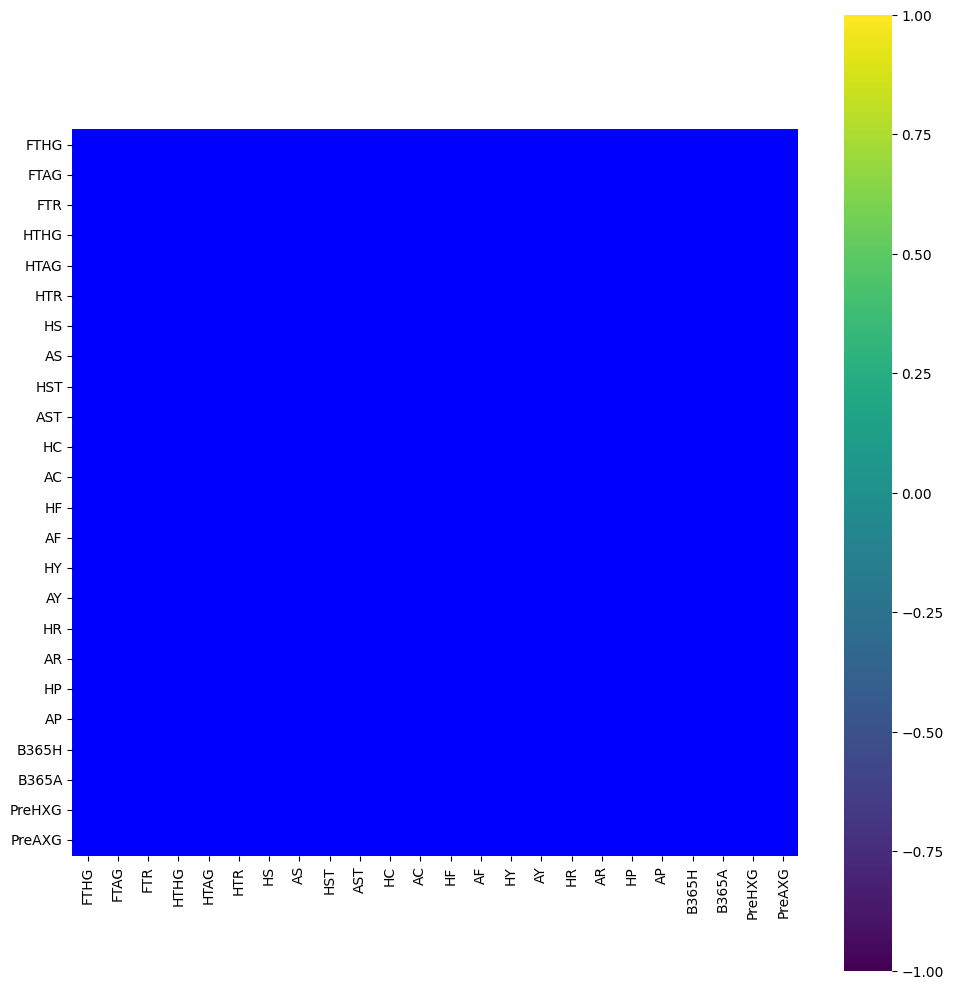

In [54]:
matrix_data = df_past1.copy()
matrix_data.drop(columns=['Date', 'HomeTeam', 'AwayTeam', 'Status', 'B365D'], inplace=True)

matrix_data['FTR'] = matrix_data['FTR'].map({'H': 1, 'D': 0, 'A': -1})
matrix_data['HTR'] = matrix_data['HTR'].map({'H': 1, 'D': 0, 'A': -1})

matrix_data['B365H'] = 1 / matrix_data['B365H']
matrix_data['B365A'] = 1 / matrix_data['B365A']

scaler = StandardScaler()
matrix_data = pd.DataFrame(scaler.fit_transform(matrix_data), columns=matrix_data.columns)

corr = matrix_data.corr(method='pearson')
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=False, cmap='viridis')
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('correlation_matrix.pdf')
plt.show()
# save fig